<a href="https://colab.research.google.com/github/Evandro72/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import random
import nltk

nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Reading CSV File
df = pd.read_csv('Tweets.csv')

# English

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Filtering English Tweets
Englishdf = df[df['Language'] == 'English']
Englishdf = Englishdf.reset_index()

for index in range(len(Englishdf)):
    Sentiment_Scores = SentimentIntensityAnalyzer().polarity_scores(Englishdf.loc[index, 'Cleaned_Tweet'])
    
    if Sentiment_Scores['compound'] >= 0.05:
        Englishdf.loc[index, 'Sentiment'] = 'Positive'    
    elif Sentiment_Scores['compound'] <= -0.05:
        Englishdf.loc[index, 'Sentiment'] = 'Negative'    
    else:    
        Englishdf.loc[index, 'Sentiment'] = 'Neutral'            

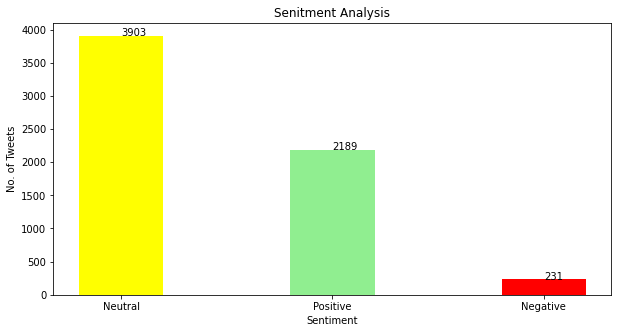

In [5]:
# Sentiment Analysis Plot

import matplotlib.pyplot as plt
import numpy as np
 
# creating the dataset
mylabels = Englishdf['Sentiment'].value_counts().keys().tolist()
myValues = Englishdf['Sentiment'].value_counts().tolist()

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mylabels, 
        myValues, 
        color = ['yellow', 'lightgreen', 'red'],
        width = 0.4)
 
for i in range(len(mylabels)):
    plt.text(i, myValues[i], myValues[i])
    
plt.xlabel("Sentiment")
plt.ylabel("No. of Tweets")
plt.title("Senitment Analysis")
plt.show()

# Italian 

In [7]:
pip install feel_it

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 13.8 MB/s 
     |████████████████████████████████| 3.3 MB 45.6 MB/s 
     |████████████████████████████████| 880 kB 63.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=ec32a471b5bd37025706b011450f9e9772e8efca51272876dfe6f809650dbdc5
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [8]:
from feel_it import EmotionClassifier, SentimentClassifier

# Filtering Italian Tweets
Italiandf = df[df['Language'] == 'Italian']
Italiandf = Italiandf.reset_index()

sentiment_classifier = SentimentClassifier()

for index in range(len(Italiandf)):
    Sentiment = sentiment_classifier.predict([Italiandf.loc[index, 'Cleaned_Tweet']])
    Italiandf.loc[index, 'Sentiment'] = Sentiment[0]    

Downloading:   0%|          | 0.00/847 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

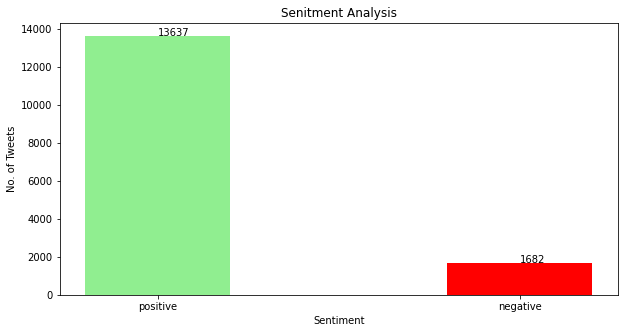

In [9]:
# Sentiment Analysis Plot

import matplotlib.pyplot as plt
import numpy as np
 
# creating the dataset
mylabels = Italiandf['Sentiment'].value_counts().keys().tolist()
myValues = Italiandf['Sentiment'].value_counts().tolist()

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mylabels, 
        myValues, 
        color = ['lightgreen', 'red'],
        width = 0.4)
 
for i in range(len(mylabels)):
    plt.text(i, myValues[i], myValues[i])
    
plt.xlabel("Sentiment")
plt.ylabel("No. of Tweets")
plt.title("Senitment Analysis")
plt.show()

# Cited Words

In [10]:
Cited_Words = ['radio', 'blog', 'festival']

### English

In [11]:
for index in range(len(Englishdf)):
    Flag = False
    
    for word in Cited_Words:        
        if word in str(Englishdf.loc[index, 'Cleaned_Tweet']).lower():
            SplitWords = Englishdf.loc[index, 'Cleaned_Tweet'].lower().split(word)

            WordCol = ''

            if len(SplitWords[0].split()) <= 5:
                WordCol += ' '.join(SplitWords[0].split()) + ' '
            else:
                WordCol += ' '.join(SplitWords[0].split()[-5:]) + ' '

            if len(SplitWords[1].split()) <= 5:
                WordCol += ' '.join(SplitWords[1].split())
            else:
                WordCol += ' '.join(SplitWords[1].split()[-5:])

            Englishdf.loc[index, word] = WordCol

        else:
            Englishdf.loc[index, word] = '-'      

# Saving to CSV
Englishdf.to_csv('English.csv', index=False)

### Italian

In [12]:
for index in range(len(Italiandf)):
    Flag = False
    
    for word in Cited_Words:        
        if word in str(Italiandf.loc[index, 'Cleaned_Tweet']).lower():
            SplitWords = Italiandf.loc[index, 'Cleaned_Tweet'].lower().split(word)

            WordCol = ''

            if len(SplitWords[0].split()) <= 5:
                WordCol += ' '.join(SplitWords[0].split()) + ' '
            else:
                WordCol += ' '.join(SplitWords[0].split()[-5:]) + ' '

            if len(SplitWords[1].split()) <= 5:
                WordCol += ' '.join(SplitWords[1].split())
            else:
                WordCol += ' '.join(SplitWords[1].split()[-5:])

            Italiandf.loc[index, word] = WordCol

        else:
            Italiandf.loc[index, word] = '-'      

# Saving to CSV
Italiandf.to_csv('Italian.csv', index=False)

## English Word Cloud

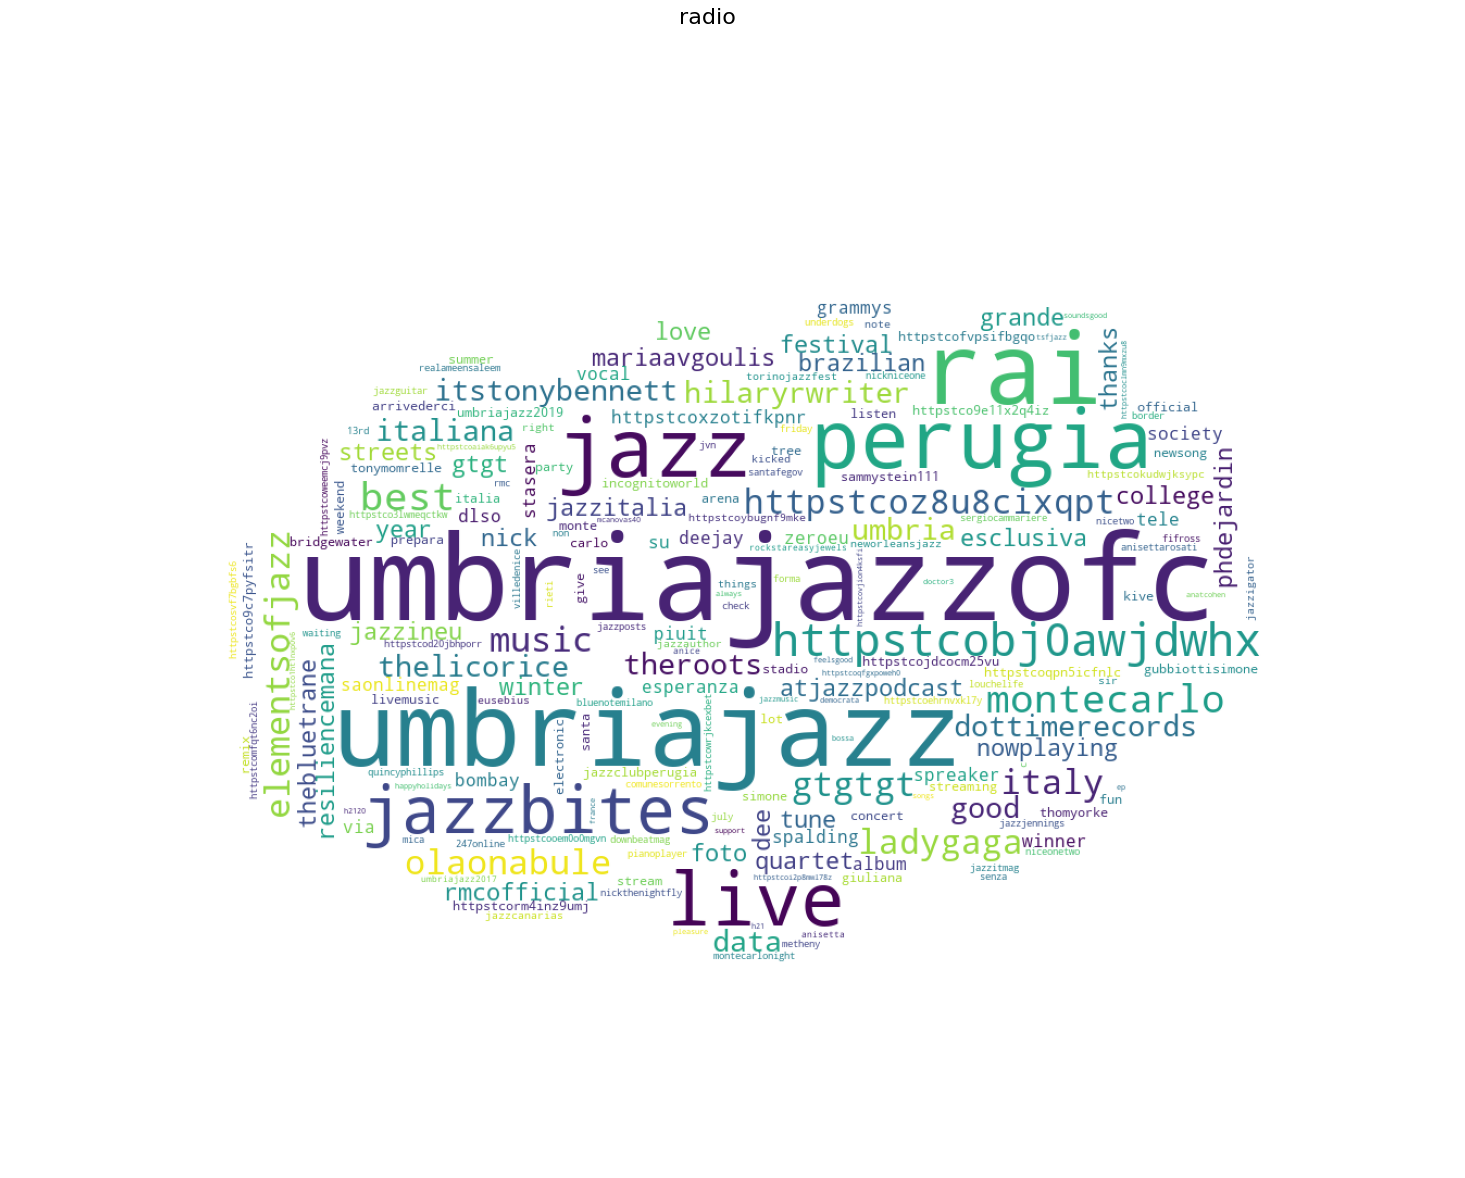

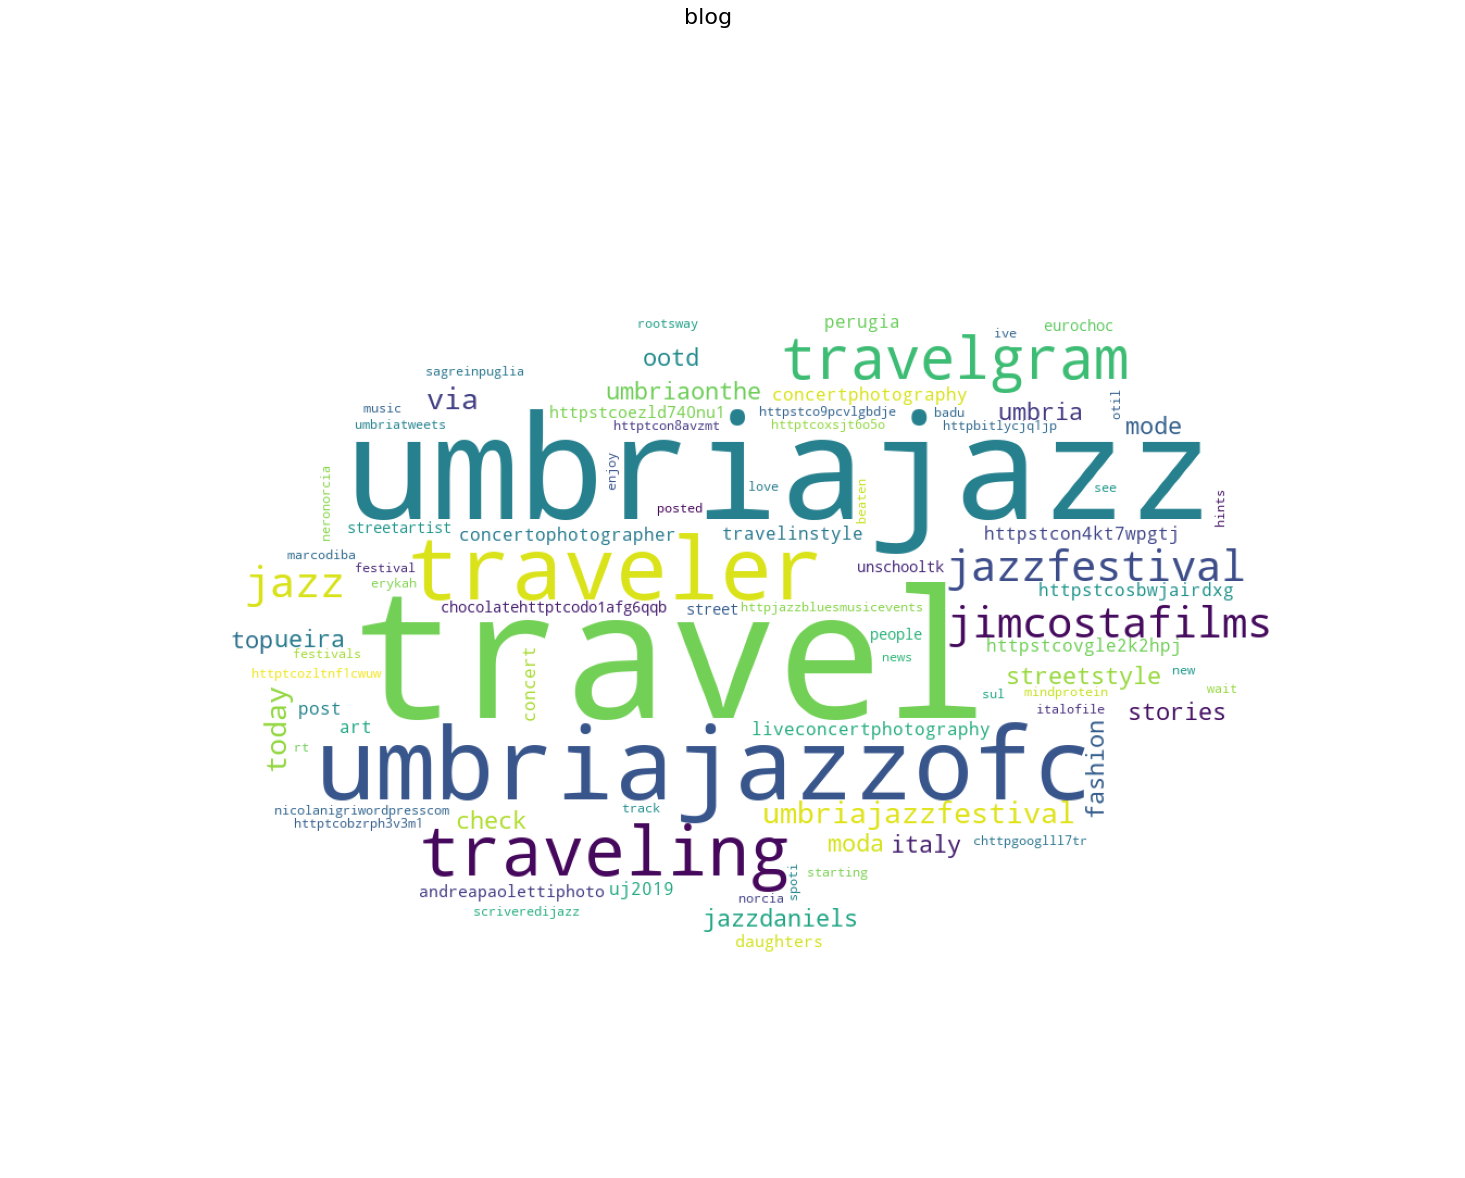

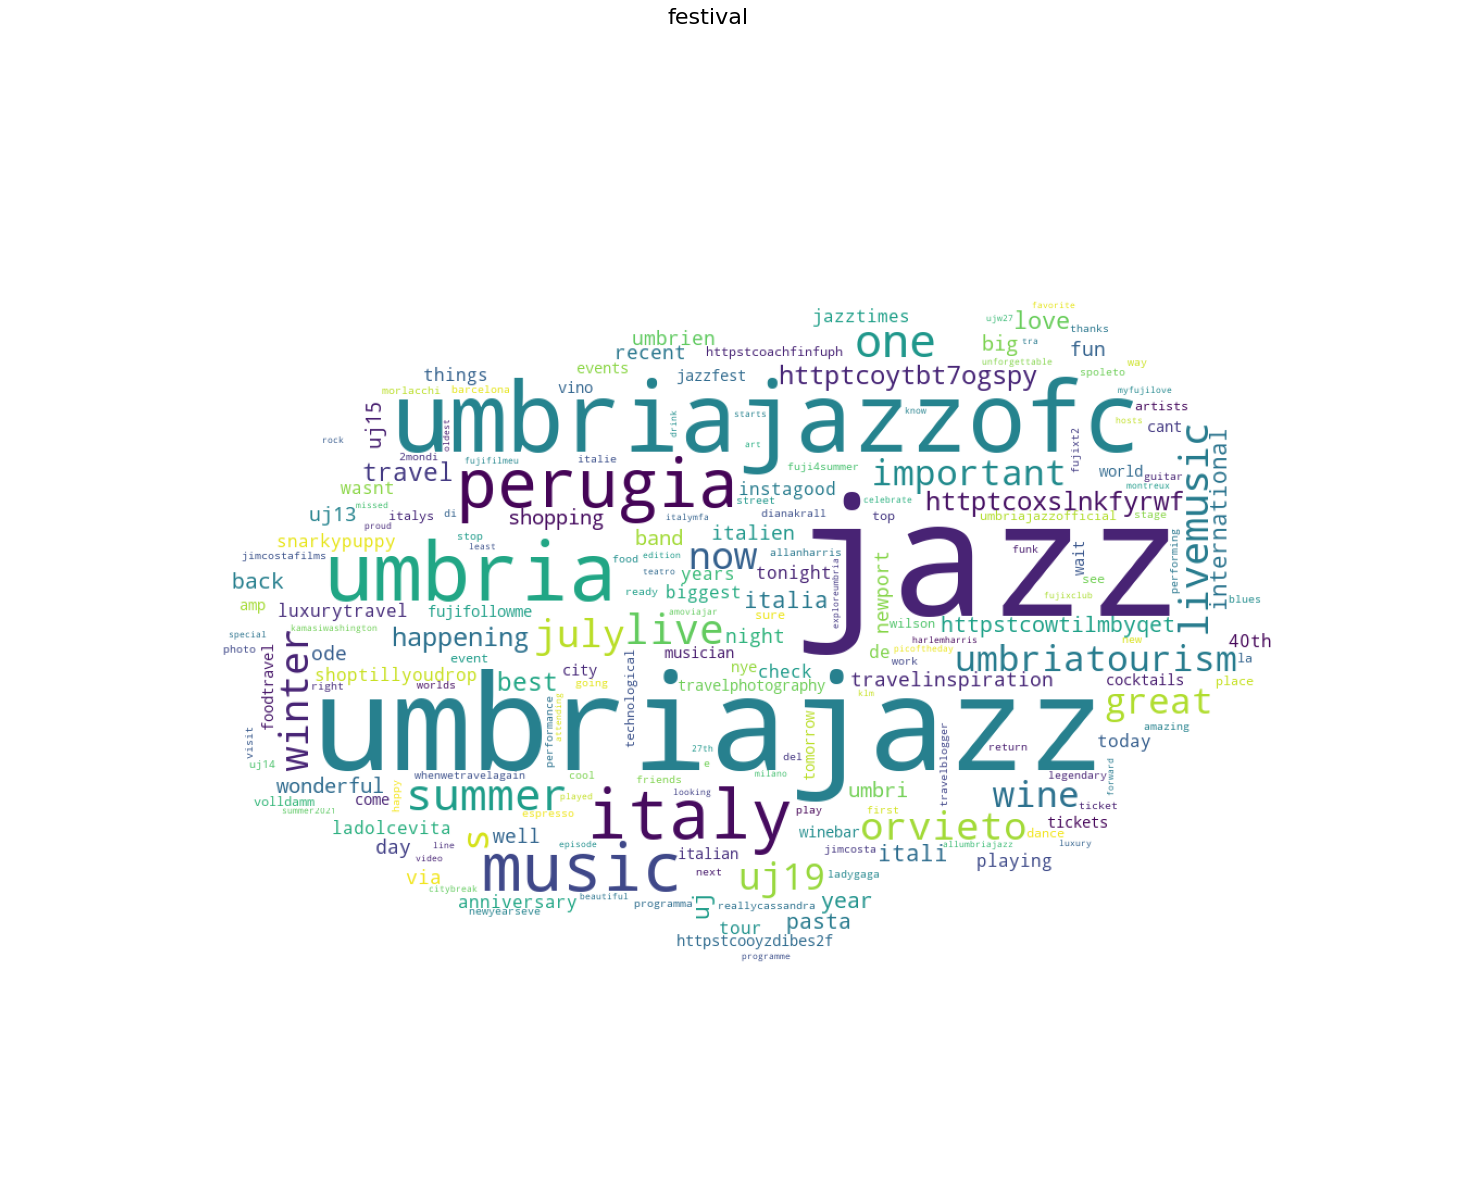

In [13]:
# for the wordcloud
mask = np.array(Image.open('cloud.png'))

for word in Cited_Words:
    Word_List = Englishdf[word].tolist()
    Word_List = [i for i in Word_List if i != '-']
    
    wordcloud = WordCloud(
                    width = 2000, 
                    height = 1334, 
                    random_state=1, 
                    background_color='white',                 
                    max_words = 200,
                    mask=mask,
                    collocations=False, 
                    normalize_plurals=False
                ).generate(' '.join(Word_List))

    fig = plt.figure(figsize=(25, 17), dpi=80)
    fig.suptitle(word, fontsize=20)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()            

## Italian Word Cloud

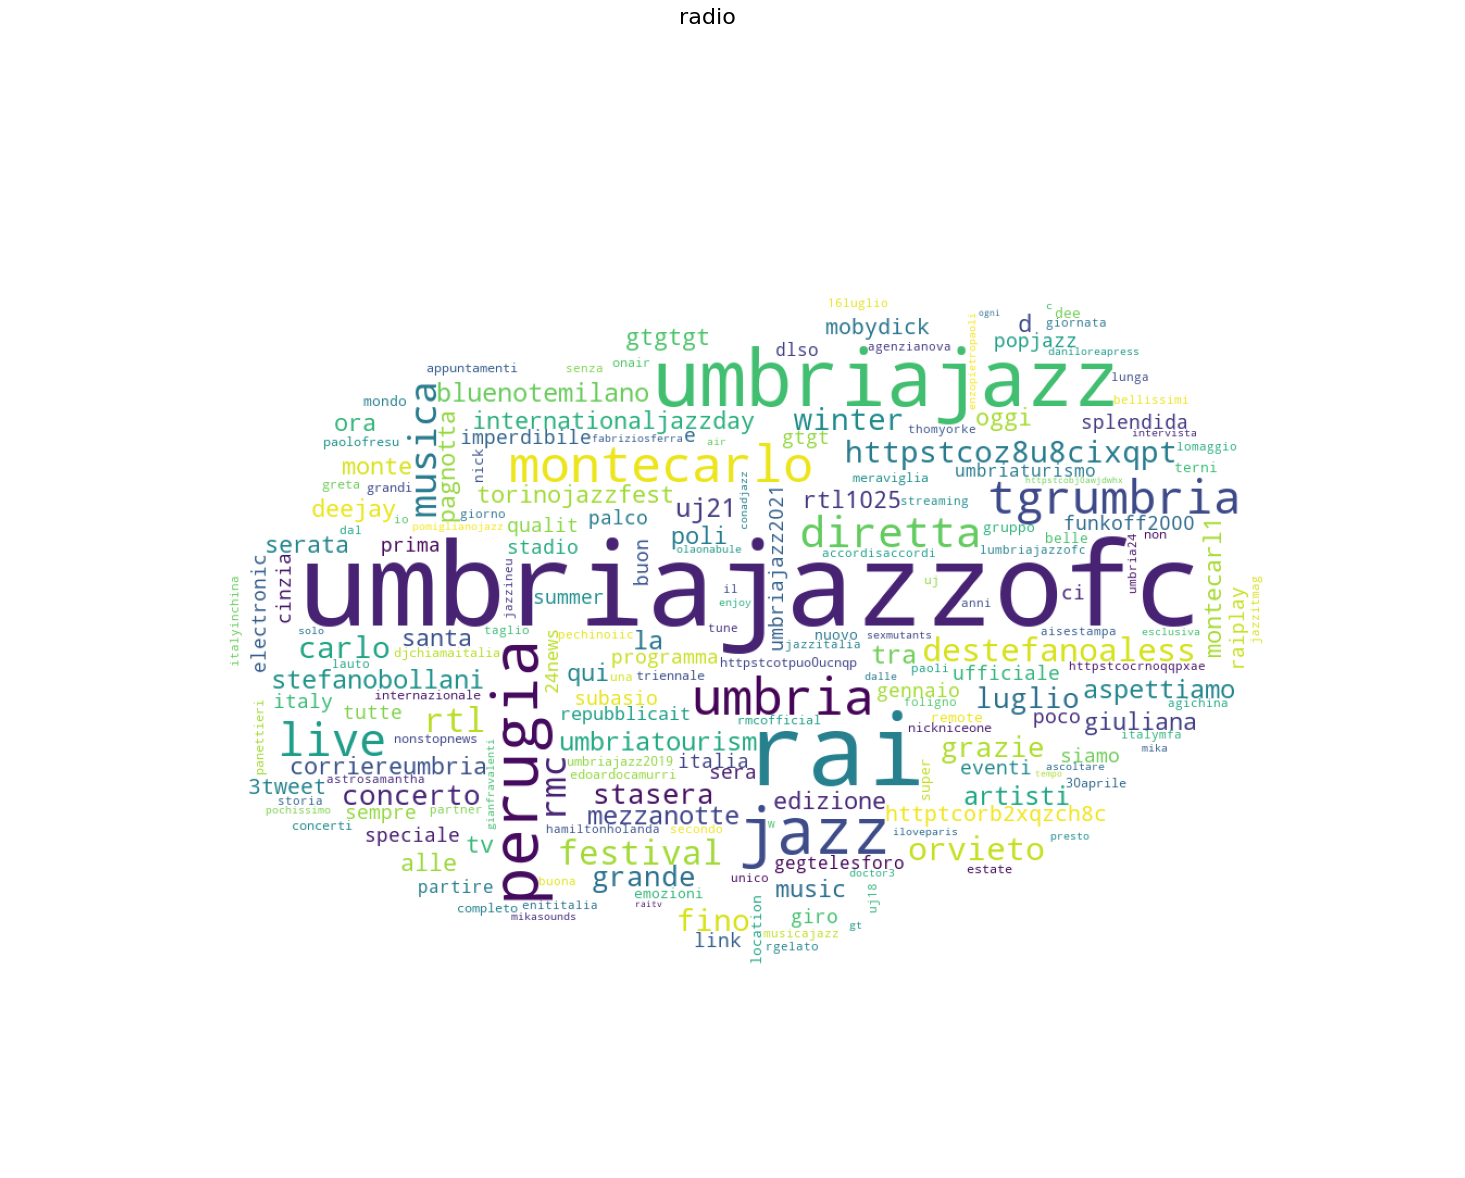

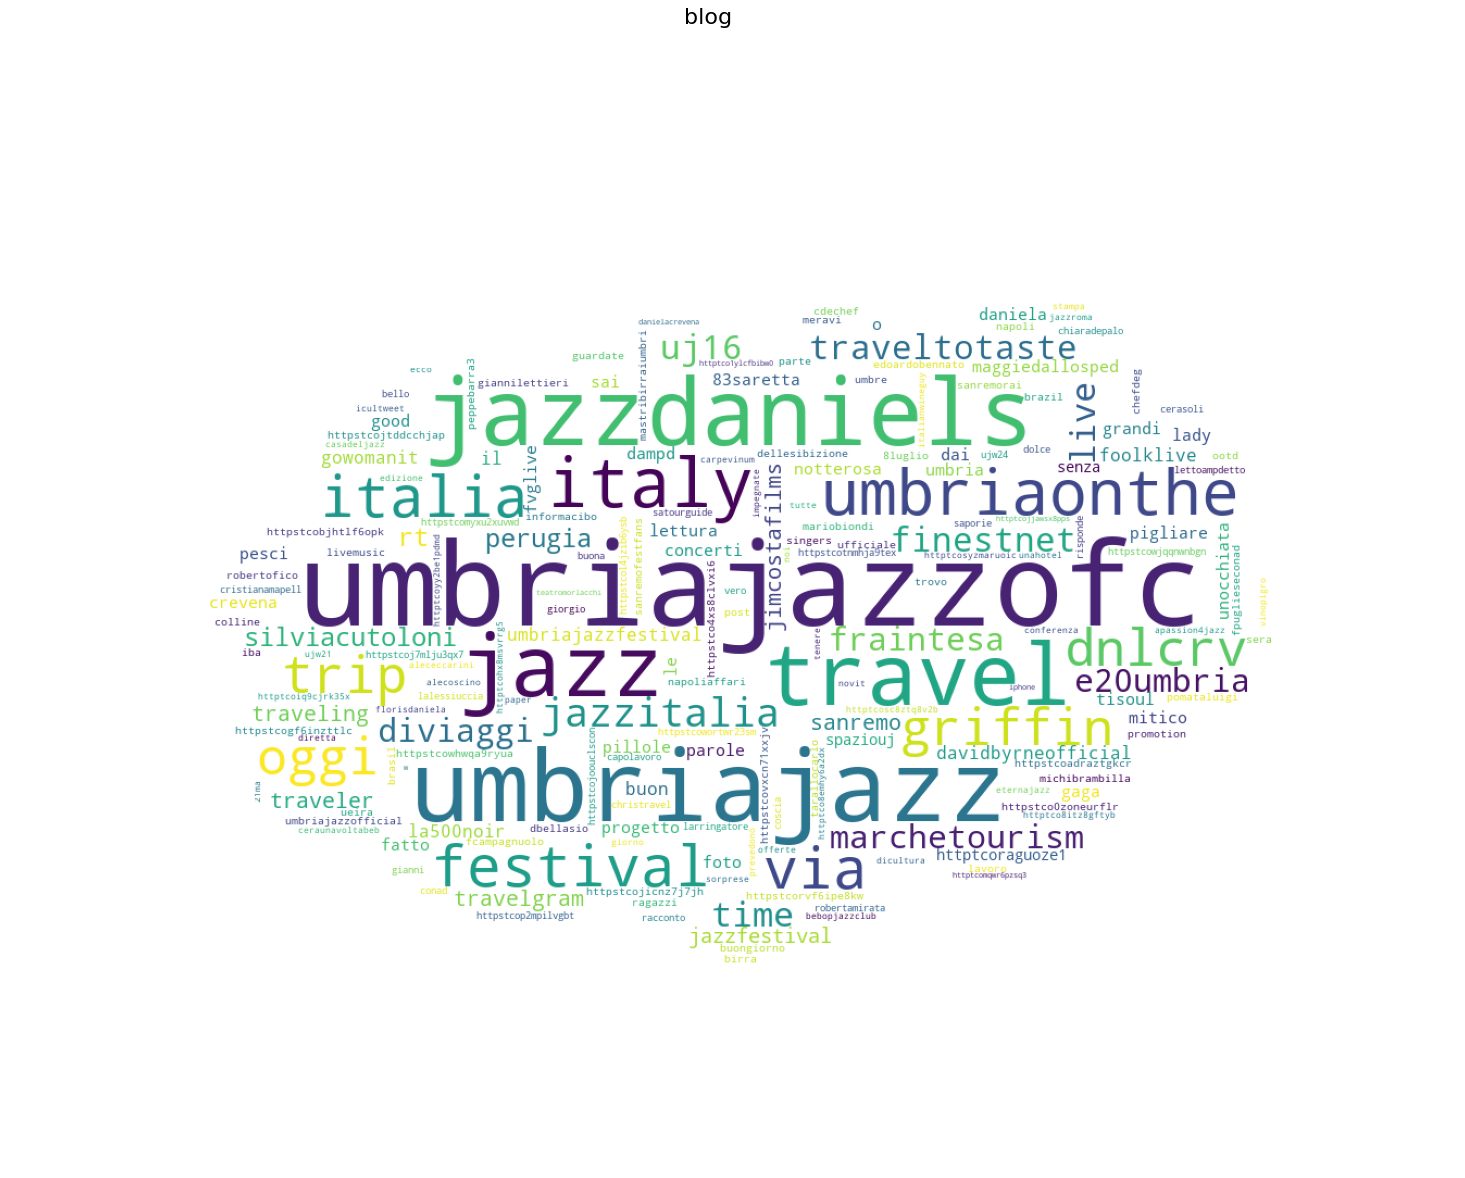

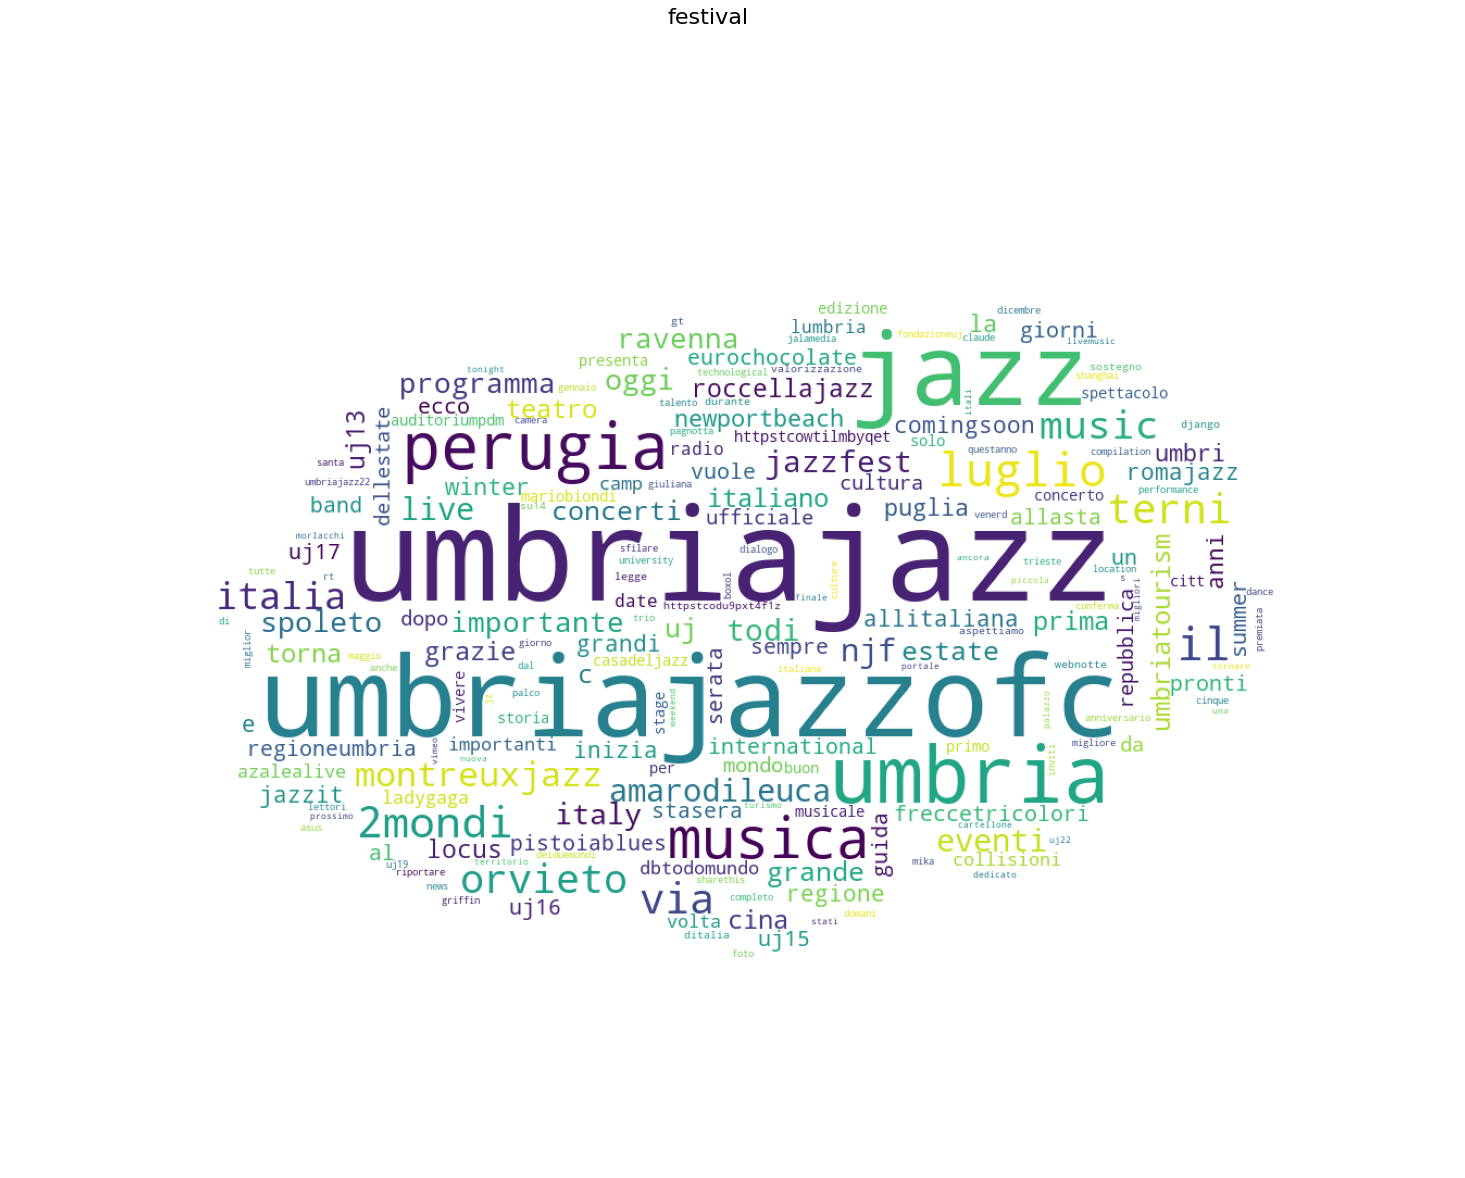

In [14]:
# for the wordcloud
mask = np.array(Image.open('cloud.png'))

for word in Cited_Words:
    Word_List = Italiandf[word].tolist()
    Word_List = [i for i in Word_List if i != '-']
    
    wordcloud = WordCloud(
                    width = 2000, 
                    height = 1334, 
                    random_state=1, 
                    background_color='white',                 
                    max_words = 200,
                    mask=mask,
                    collocations=False, 
                    normalize_plurals=False
                ).generate(' '.join(Word_List))

    fig = plt.figure(figsize=(25, 17), dpi=80)
    fig.suptitle(word, fontsize=20)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()            